---
title: "30 Day Map Challenge 2024 - Day 6: Raster"
categories:
  - Project
tags:
  - 30daymapchallenge
  - python
  - programming
classes: wide
header:
  teaser: /assets/images/30daymapchallenge2024-day6.png
---

The theme for day six is _Raster_:
> A map using raster data. Rasters are everywhere, but today’s focus is purely on grids and pixels - satellite imagery, heatmaps, or any continuous surface data. 

### Data

Today, I will again use data from [Dresden OpenDataPortal](https://opendata.dresden.de/informationsportal/), specifically the data of the [digital terrain model](https://opendata.dresden.de/informationsportal/?open=1&result=9F7A6477F63840F791F7CCD50C6CD9CF#app/mainpage) with a resolution of 1 meter.
The data is provided in GeoTIFF format, a special kind of the TIF image format with additional georeferencing information embedded, like projection, coordinate system, ellipsoids, etc.

## Implementation

Besides the well-known data handling and plotting libraries, we will use `rasterio` for loading the GeoTIFF file:

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.patches as patches
import numpy as np
import geopandas as gpd
import pandas as pd
from geopy.geocoders import Nominatim
from utils import read_dresden_csv

overpass turbo query:
```
node[amenity=charging_station](51.0,13.666666,51.1,13.833333);
out geom;
```

In [2]:
gdf_charging_stations = gpd.read_file("data/osm/charging_stations_dresden.geojson")

In [9]:
# source: https://www.deutschefotothek.de/cms/kartenforum-sachsen-messtischblaetter066.xml
# permalink to search: https://www.deutschefotothek.de/gallery/freitext/df_dk_0000316
# permalink to map: https://www.deutschefotothek.de/documents/obj/70302465/
# copyright: public domain
image_raw = rasterio.open("data/map_dresden_1926.jpg")
# image_raw.read(1)

/home/stanley/.miniconda3/envs/30daymapchallenge/lib/python3.12/site-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [10]:
gcps = [
    rasterio.control.GroundControlPoint(col= 307, row= 332, y=51.08368419427998, x=13.686551101853567),
    rasterio.control.GroundControlPoint(col= 151, row=1202, y=51.01389086947117, x=13.665240136707837),
    rasterio.control.GroundControlPoint(col=1273, row=1231, y=51.01168185051654, x=13.808524372827599),
    rasterio.control.GroundControlPoint(col=1340, row= 263, y=51.08922315122832, x=13.818753999574017),
]
transformation = rasterio.transform.from_gcps(gcps)

In [11]:
unRefRaster = image_raw
outputPath = 'data/georefRaster.tif'
#create raster and write bands
with rasterio.open(
    outputPath,
    'w',
    driver='GTiff',
    height=unRefRaster.read(1).shape[0],
    width=unRefRaster.read(1).shape[1],
    count=3,
    dtype=unRefRaster.read(1).dtype,
    crs=rasterio.crs.CRS.from_epsg(4326),
    transform=transformation,
) as dst:
    dst.write(unRefRaster.read(1), 1)
    dst.write(unRefRaster.read(2), 2)
    dst.write(unRefRaster.read(3), 3)
geoRaster = rasterio.open(outputPath)


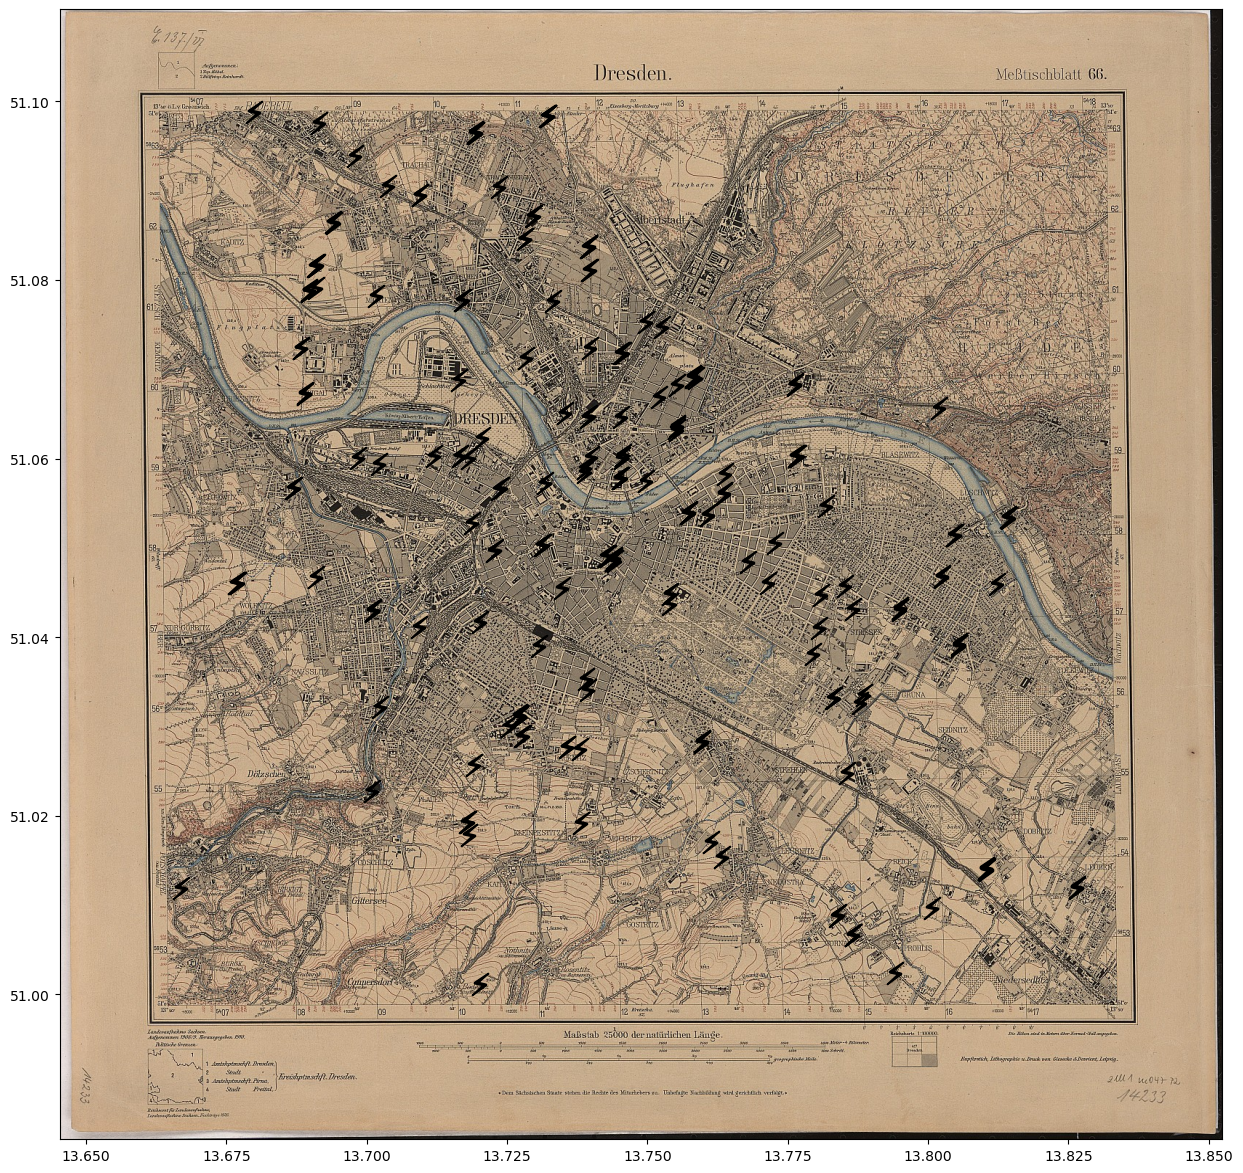

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
show(geoRaster, ax=ax)

gdf_charging_stations["geometry"].plot(
    ax=ax,
    markersize=256,
    color="black",
    marker="$⚡$"
)

plt.show()